1. Выберите задачу для бизнеса, которую Вы хотите решить с помощью методов машинного обучения. На основание бизнес-задачи, поставьте задачу машинного обучения. Подберите дата-сет и оставьте ссылку на него.


Бизнес задача: узнать будет ли раскрыто убийство или нет

Задача машинного обучения: Бинарная классификация

Ссылка: https://www.kaggle.com/datasets/zynicide/wine-reviews?resource=download

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

2.	 Выполните анализ и обработку дата-сета. Этот задание включает в себя следующие этапы работы с данными:

•	Первичный анализ данных

•	Предобработку данных

•	Разведывательный анализ данных (Exploratory Data Analysis)

•	Создание признаков (Feature Engineering)

•	Отбор признаков (Feature selection)

•	Подготовка данных (Data Preparation)

In [82]:
df = pd.read_csv("database.csv")

<ipython-input-82-89aad2696c6d>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("database.csv")


In [69]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [6]:
df.keys()

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [7]:
df.describe(include=['O'])

,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
count,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454
unique,12003,9216,7,1782,51,12,2,2,3,5,3,3,191,5,3,28,16,2
top,NY03030,New York,Municipal Police,Los Angeles,California,July,Murder or Manslaughter,Yes,Male,White,Unknown,Male,0,White,Unknown,Unknown,Handgun,FBI
freq,38416,38416,493026,44511,99783,58696,629338,448172,494125,317422,368303,399541,211079,218243,446410,273013,317484,616647


In [71]:
df_target = df["Crime Solved"]

In [76]:
df_target.value_counts()

Crime Solved
Yes    448172
No     190282
Name: count, dtype: int64

In [83]:
df = df[df["Victim Age"]<100]
df = df[df["Victim Sex"] != "Unknown"]

In [147]:
df_x = df.drop(["Crime Solved"], axis = 1)
df_target = df["Crime Solved"]

In [86]:
df_target.value_counts()

Crime Solved
Yes    447687
No     189529
Name: count, dtype: int64

In [ ]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, 20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

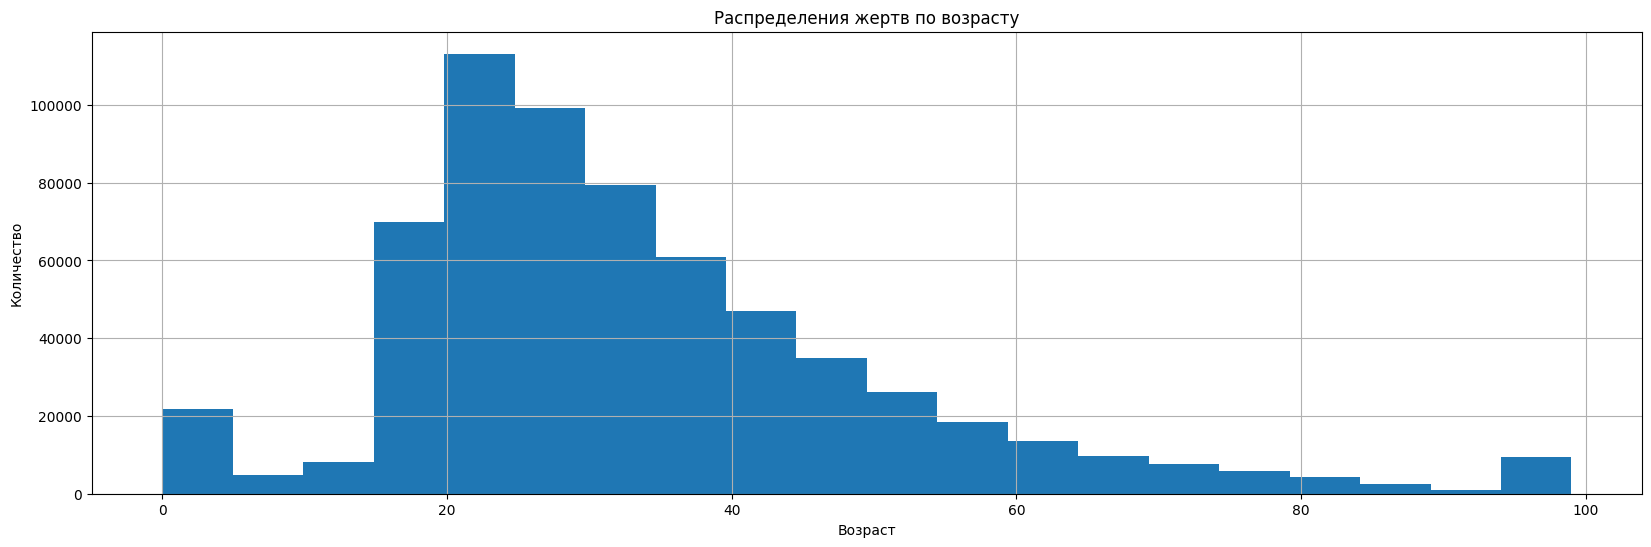

In [ ]:
custom_hist(df["Victim Age"], 'Распределения жертв по возрасту', 'Возраст')

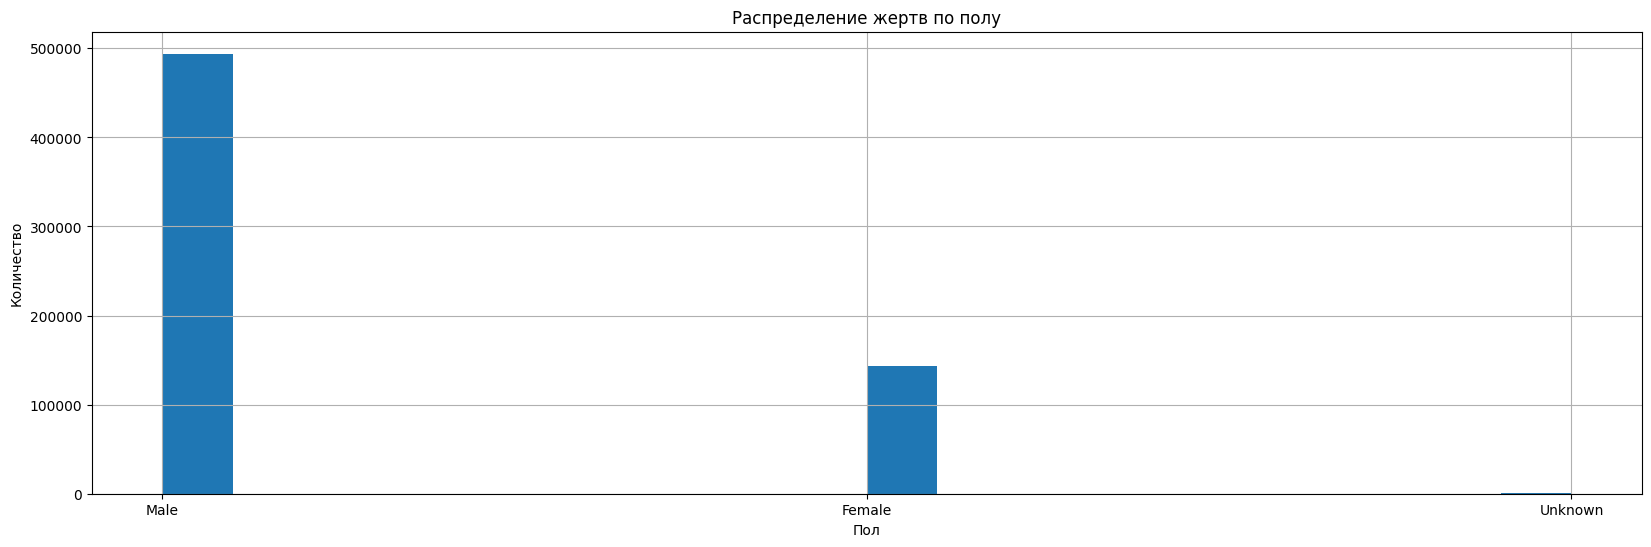

In [ ]:
custom_hist(df["Victim Sex"], 'Распределение жертв по полу','Пол')

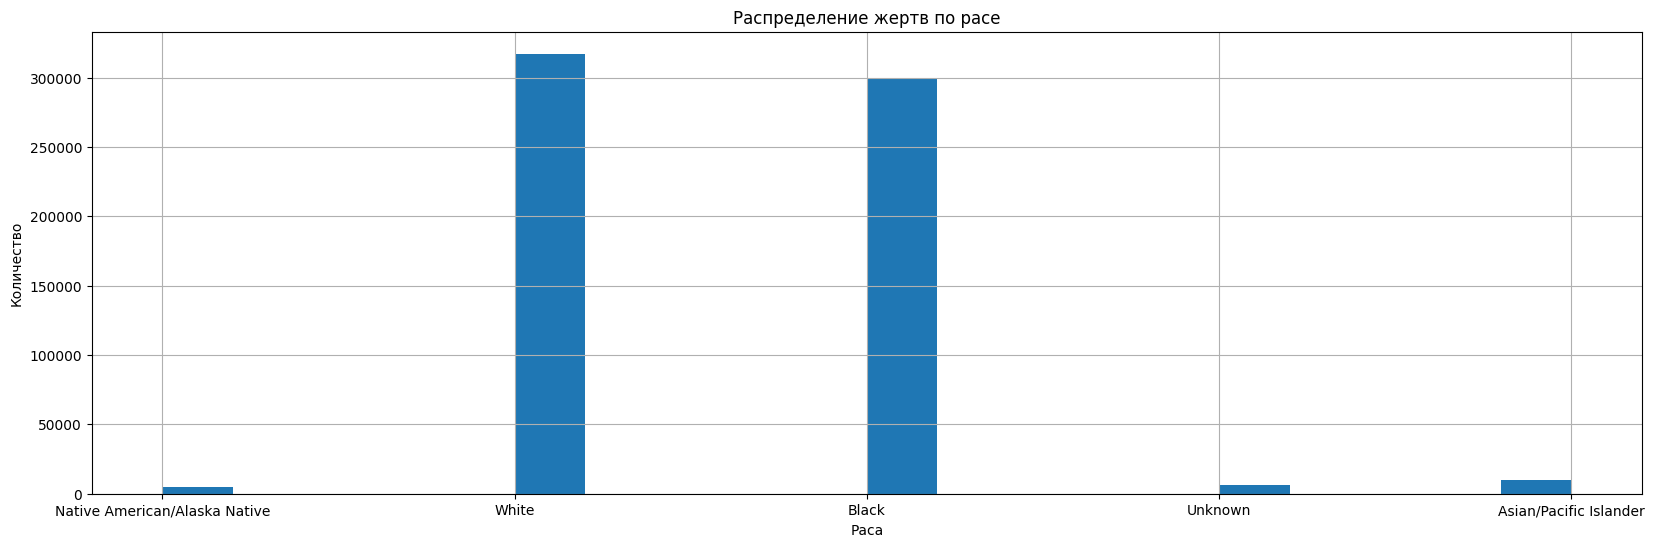

In [ ]:
custom_hist(df["Victim Race"], 'Распределение жертв по расе','Раса')

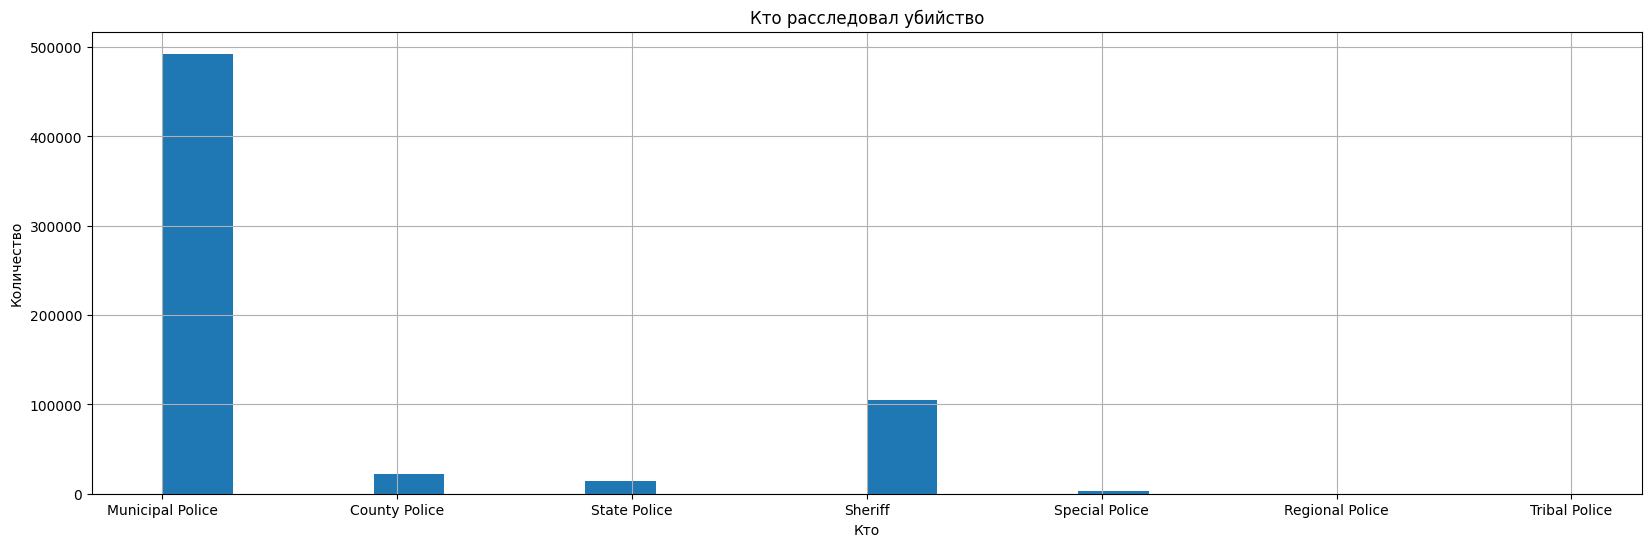

In [ ]:
custom_hist(df["Agency Type"], 'Кто расследовал убийство','Кто')

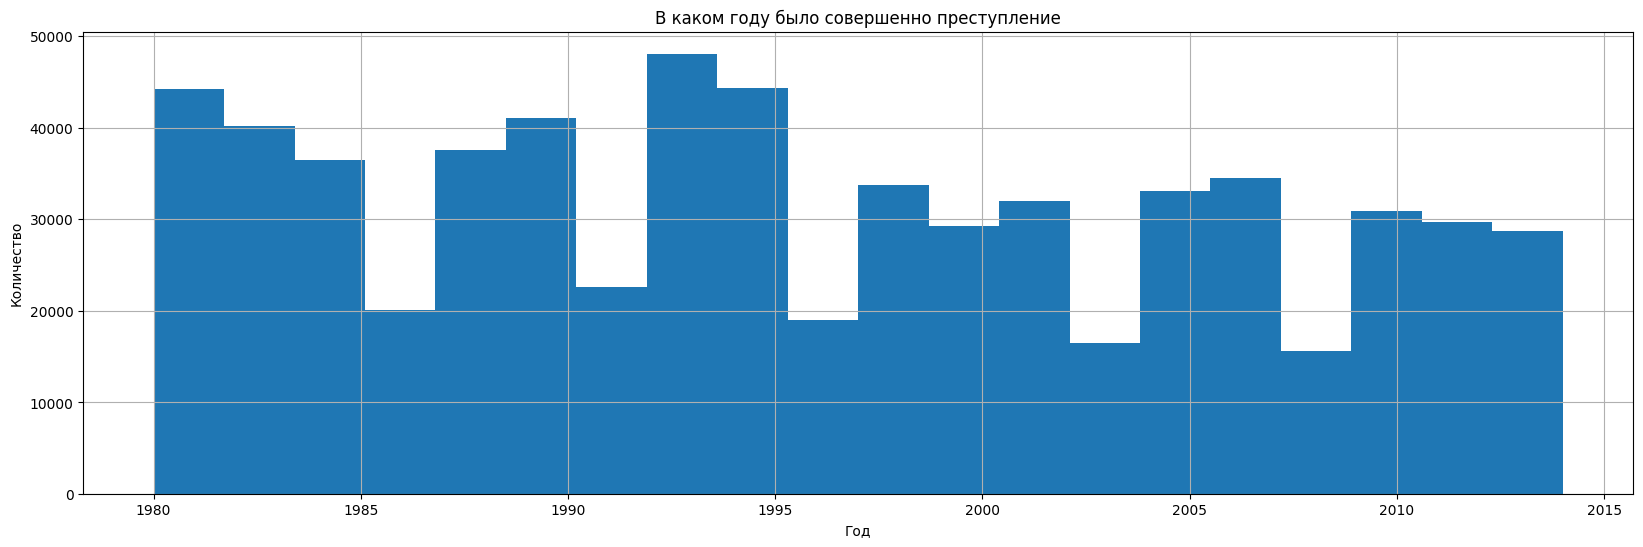

In [ ]:
custom_hist(df["Year"], 'В каком году было совершенно преступление','Год')

In [ ]:
df["Crime Solved"] = df['Crime Solved'].replace({'No': 0, 'Yes': 1})

<Axes: xlabel='Crime Solved', ylabel='count'>

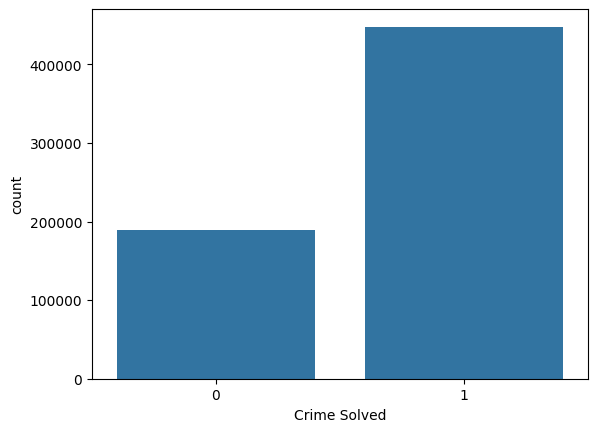

In [ ]:
sns.countplot(x='Crime Solved', data=df)

<Axes: xlabel='Crime Solved', ylabel='count'>

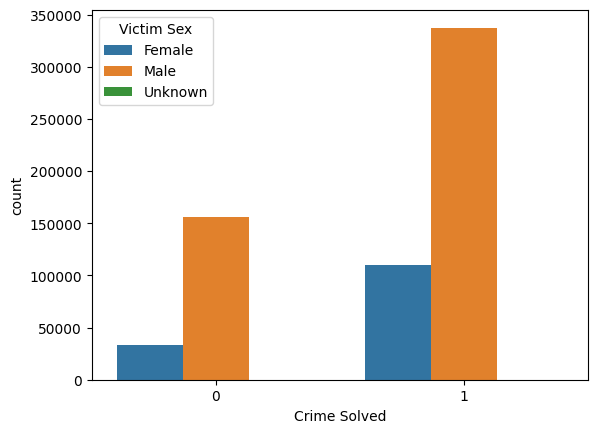

In [ ]:
sns.countplot(x='Crime Solved', data=df, hue='Victim Sex')

<Axes: xlabel='Crime Solved', ylabel='count'>

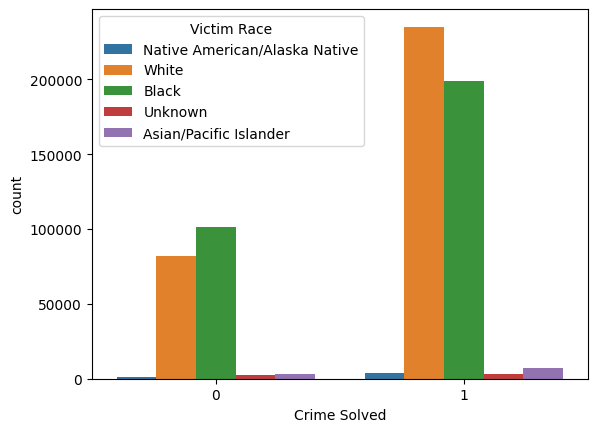

In [ ]:
sns.countplot(x='Crime Solved', data=df, hue='Victim Race')

<Axes: xlabel='Crime Solved', ylabel='count'>

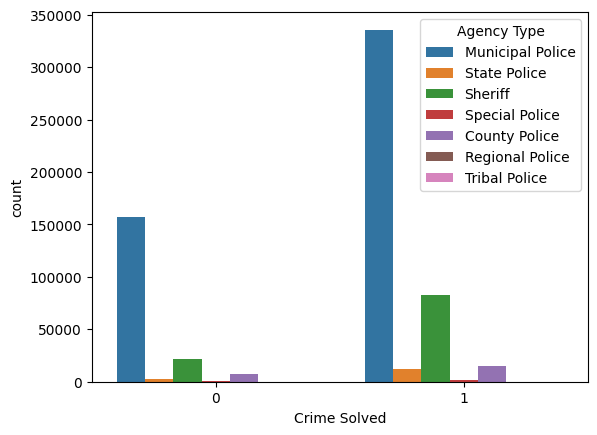

In [ ]:
sns.countplot(x='Crime Solved', data=df, hue='Agency Type')

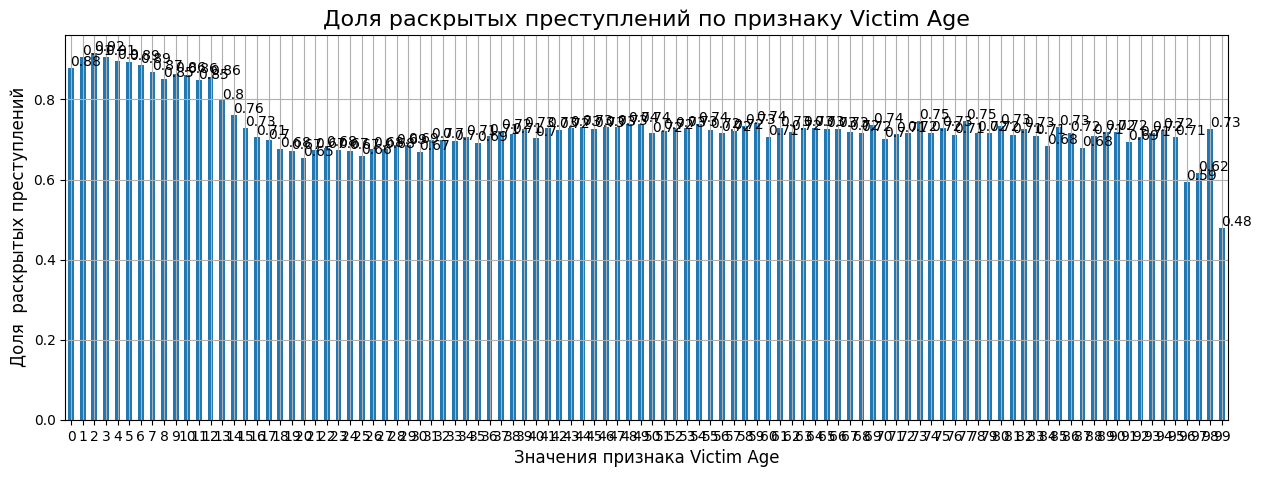

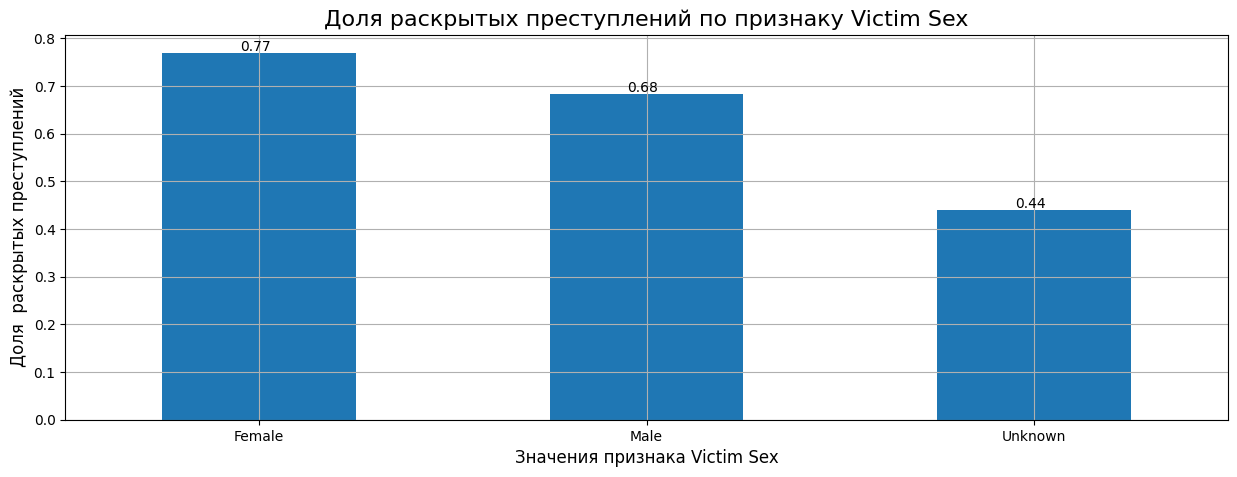

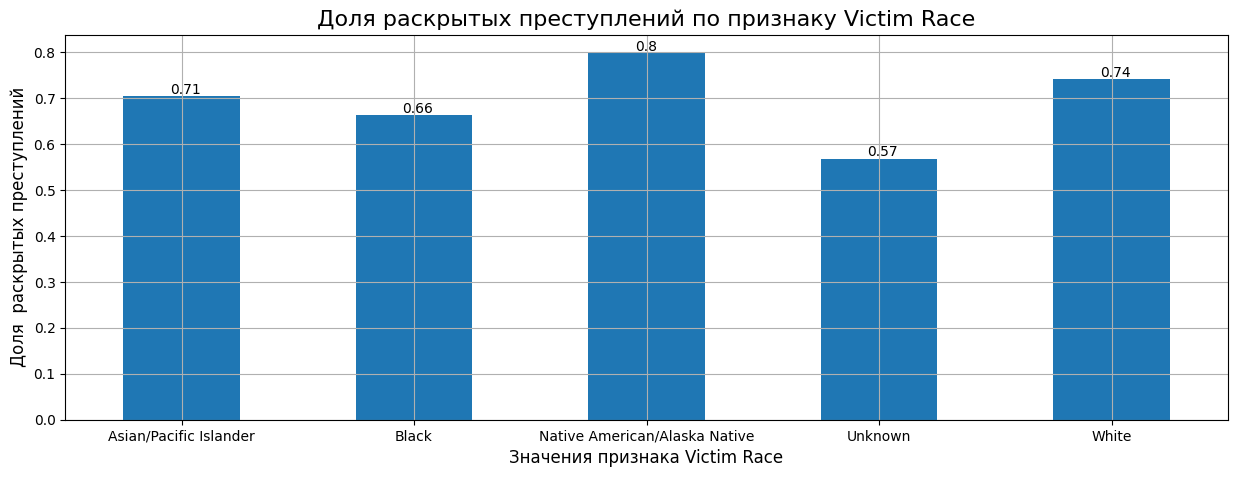

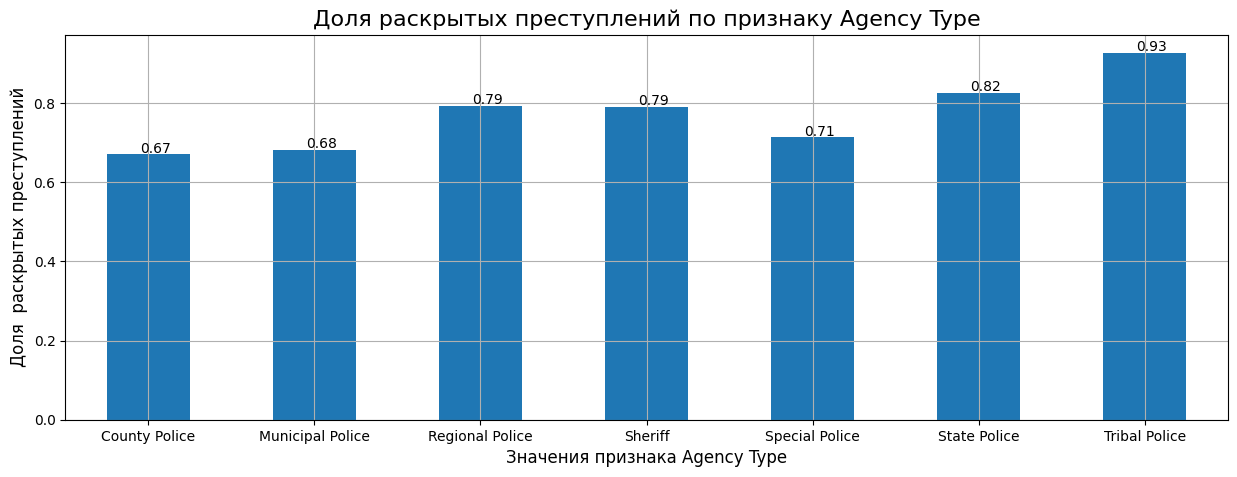

In [ ]:
columns_to_look = ['Victim Age', 'Victim Sex', 'Victim Race', 'Agency Type']

for column in columns_to_look:
    pivot = df.pivot_table(index=column, values='Crime Solved', aggfunc='mean')

    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля раскрытых преступлений по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля  раскрытых преступлений', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})

    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))

    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax)
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})

<Axes: >

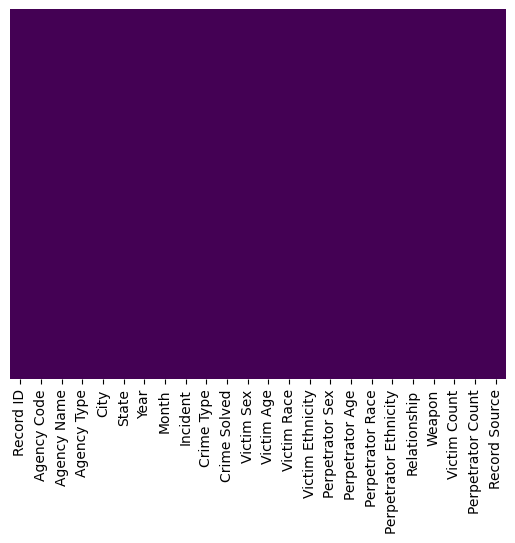

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Пустые строки отсутствуют

In [ ]:
df_x.duplicated().sum()

0

Дублирующие строки отсутствуют

Преобразуем столбцы df_x. Удалим ненужные столбцы

In [10]:
df_x

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [11]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Victim Sex             638454 non-null  object
 11  Victim Age             638454 non-null  int64 
 12  Victim Race            638454 non-null  object
 13  Victim Ethnicity       638454 non-null  object
 14  Perpetrator Sex        638454 non-null  object
 15  

In [172]:
df_x = df_x.drop(["Record ID", "Agency Code", "Agency Name", "City", "Year", "Month", "Perpetrator Age",
                  "Perpetrator Race","Perpetrator Ethnicity", "Victim Count", "Perpetrator Count", "Record Source","Incident"], axis = 1)

In [52]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447603 entries, 0 to 638453
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Agency Type      447603 non-null  object
 1   State            447603 non-null  object
 2   Crime Type       447603 non-null  object
 3   Victim Sex       447603 non-null  object
 4   Victim Age       447603 non-null  int64 
 5   Victim Race      447603 non-null  object
 6   Perpetrator Sex  447603 non-null  object
dtypes: int64(1), object(6)
memory usage: 27.3+ MB


In [88]:
df_x

,Agency Type,State,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex
0,Municipal Police,Alaska,Murder or Manslaughter,Male,14,Native American/Alaska Native,Male
1,Municipal Police,Alaska,Murder or Manslaughter,Male,43,White,Male
2,Municipal Police,Alaska,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown
3,Municipal Police,Alaska,Murder or Manslaughter,Male,43,White,Male
4,Municipal Police,Alaska,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown
...,...,...,...,...,...,...,...
638449,Sheriff,Wyoming,Murder or Manslaughter,Male,30,White,Unknown
638450,Sheriff,Wyoming,Murder or Manslaughter,Male,62,White,Male
638451,Municipal Police,Wyoming,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Female
638452,Sheriff,Wyoming,Murder or Manslaughter,Male,55,White,Male


Заменим на числовые значения оставшиеся столбцы в df_x

In [153]:
df_x["Weapon"].value_counts()

Weapon
Handgun          317223
Knife             94875
Blunt Object      67221
Firearm           46832
Unknown           32663
Shotgun           30703
Rifle             23334
Strangulation      8104
Fire               6146
Suffocation        3961
Gun                2195
Drugs              1578
Drowning           1202
Explosives          537
Poison              453
Fall                189
Name: count, dtype: int64

In [54]:
df_x["Agency Type"].value_counts()

Agency Type
Municipal Police    335665
Sheriff              82822
County Police        15148
State Police         11686
Special Police        2046
Regional Police        186
Tribal Police           50
Name: count, dtype: int64

In [116]:
df_x['Agency Type'] = df_x['Agency Type'].replace({"Special Police":"Tribal Police", "State Police":"Tribal Police", "County Police":"Tribal Police", "Regional Police":"Tribal Police"})

In [58]:
df_x["Agency Type"].value_counts()

Agency Type
Municipal Police    335665
Sheriff              82822
Tribal Police        29116
Name: count, dtype: int64

In [154]:
df_x["Relationship"].value_counts()

Relationship
Unknown                 272004
Acquaintance            125969
Stranger                 96535
Wife                     23179
Friend                   21933
Girlfriend               16460
Son                       9881
Family                    9521
Husband                   8802
Daughter                  7495
Boyfriend                 7302
Neighbor                  6291
Brother                   5514
Father                    4361
Mother                    4243
In-Law                    3636
Common-Law Wife           2476
Ex-Wife                   1972
Common-Law Husband        1954
Boyfriend/Girlfriend      1382
Stepfather                1360
Sister                    1292
Stepson                   1169
Stepdaughter               753
Ex-Husband                 629
Employer                   509
Employee                   383
Stepmother                 211
Name: count, dtype: int64

In [155]:
df_x['Relationship'] = df_x['Relationship'].replace({"Wife":"Family", "Son":"Family", "Husband":"Family", "Daughter":"Family", "Brother":"Family", "Father":"Family",
                                                     "Mother":"Family", "In-Law":"Family", "Stepfather":"Family", "Sister":"Family", "Stepson":"Family",
                                                     "Stepdaughter":"Family", "Stepmother":"Family", "Girlfriend":"Friend", "Boyfriend":"Friend",
                                                     "Boyfriend/Girlfriend":"Friend", "Common-Law Wife":"Friend", "Common-Law Husband":"Friend", "Employer":"Employee", "Ex-Wife":"Ex-Husband"})

In [157]:
df_x["Relationship"].value_counts()

Relationship
Unknown         272004
Acquaintance    125969
Stranger         96535
Family           81417
Friend           51507
Neighbor          6291
Ex-Husband        2601
Employee           892
Name: count, dtype: int64

In [156]:
df_x["Victim Sex"].value_counts()

Victim Sex
Male      493944
Female    143272
Name: count, dtype: int64

In [158]:
def find_sex(x):
  if x == "Female":
    return 1
  if x == "Male":
    return 0
  if x == "Unknown":
    return 2


df_x['Victim Sex'] = df_x['Victim Sex'].apply(find_sex)
df_x['Perpetrator Sex'] = df_x['Perpetrator Sex'].apply(find_sex)

In [159]:
df_x["Perpetrator Sex"].value_counts()

Perpetrator Sex
0    399135
2    189613
1     48468
Name: count, dtype: int64

In [160]:
df_x["Victim Sex"].value_counts()

Victim Sex
0    493944
1    143272
Name: count, dtype: int64

In [161]:
df_x["Victim Ethnicity"].value_counts()

Victim Ethnicity
Unknown         367124
Not Hispanic    197456
Hispanic         72636
Name: count, dtype: int64

In [162]:
def find_eth(x):
  if x == "Not Hispanic":
    return 1
  if x == "Hispanic":
    return 0
  if x == "Unknown":
    return 2


df_x['Victim Ethnicity'] = df_x['Victim Ethnicity'].apply(find_eth)

In [164]:
df_x["Victim Ethnicity"].value_counts()

Victim Ethnicity
2    367124
1    197456
0     72636
Name: count, dtype: int64

In [163]:
df_x["Victim Age"].value_counts()

Victim Age
22    23046
20    23021
25    22936
21    22789
23    22435
      ...  
94      115
95       80
97       39
96       37
98       33
Name: count, Length: 100, dtype: int64

In [165]:
df_x["Victim Race"].value_counts()

Victim Race
White                            317248
Black                            299759
Asian/Pacific Islander             9887
Unknown                            5758
Native American/Alaska Native      4564
Name: count, dtype: int64

In [166]:
def find_race(x):
  if x == "White":
    return 1
  if x == "Black":
    return 0
  if x != "White" and x!= "Black":
    return 2

df_x['Victim Race'] = df_x['Victim Race'].apply(find_race)

In [167]:
df_x["Victim Race"].value_counts()

Victim Race
1    317248
0    299759
2     20209
Name: count, dtype: int64

In [94]:
df_target.value_counts()

Crime Solved
Yes    447687
No     189529
Name: count, dtype: int64

In [168]:
df_target = df_target.replace({'No': 0, 'Yes': 1})

In [169]:
df_target.value_counts()

Crime Solved
1    447687
0    189529
Name: count, dtype: int64

Итог: мы преобразовали все колонки, которые могли

In [170]:
df_x = df_x.drop(["Crime Type"], axis = 1)

In [211]:
df_x = df_x.drop(["Perpetrator Sex"], axis = 1)

In [173]:
df_x

,Agency Type,State,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Relationship,Weapon
0,Municipal Police,Alaska,0,14,2,2,0,Acquaintance,Blunt Object
1,Municipal Police,Alaska,0,43,1,2,0,Acquaintance,Strangulation
2,Municipal Police,Alaska,1,30,2,2,2,Unknown,Unknown
3,Municipal Police,Alaska,0,43,1,2,0,Acquaintance,Strangulation
4,Municipal Police,Alaska,1,30,2,2,2,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...
638449,Sheriff,Wyoming,0,30,1,0,2,Unknown,Handgun
638450,Sheriff,Wyoming,0,62,1,2,0,Acquaintance,Handgun
638451,Municipal Police,Wyoming,1,0,2,2,1,Family,Suffocation
638452,Sheriff,Wyoming,0,55,1,1,0,Stranger,Knife


In [ ]:
df_x.shape

(637216, 4)

In [174]:
df_x.columns

Index(['Agency Type', 'State', 'Victim Sex', 'Victim Age', 'Victim Race',
       'Victim Ethnicity', 'Perpetrator Sex', 'Relationship', 'Weapon'],
      dtype='object')

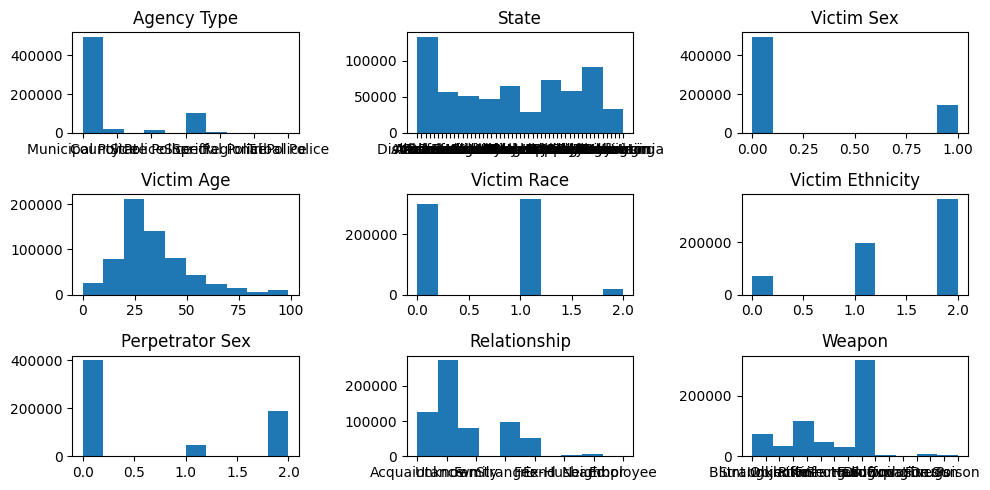

In [175]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))

# Разворачиваем двумерный массив axs в одномерный для удобства обращения
axs = axs.flatten()

# Перебираем каждый столбец и строим гистограмму
for i, col in enumerate(df_x.columns):
    axs[i].hist(df_x[col], bins=10)  # Можно настроить количество бинов (столбцов) по желанию
    axs[i].set_title(col)  # Устанавливаем заголовок для каждой гистограммы

plt.tight_layout()  # Для улучшения визуального отображения
plt.show()

1) Чаще всего убивают мужчин в возрасте от 20 до 30 европиоидной или негроидной расы

2) Женщин убивают намного реже чем мужчин

3) Пенсионеров убиваю реже всех

4) Чаще всего убивают мужчины

5) Просто знакомые убивают чаще всего, реже всего коллеги

In [176]:
import seaborn as sns

In [217]:
numeric_columns = df_x.select_dtypes(include=['int', 'float'])
numeric_columns.head()

,Victim Sex,Victim Age,Victim Race,Victim Ethnicity
0,0,14,2,2
1,0,43,1,2
2,1,30,2,2
3,0,43,1,2
4,1,30,2,2


<Axes: >

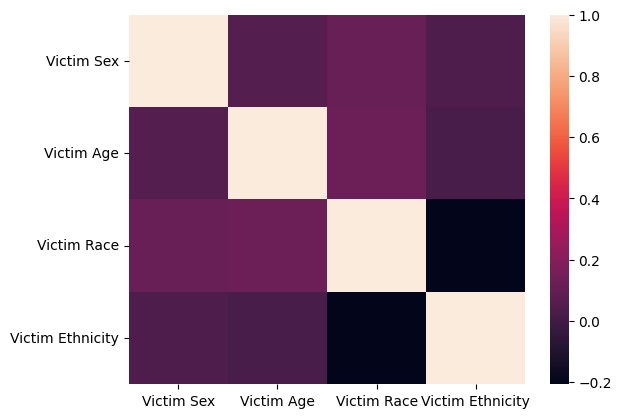

In [218]:
sns.heatmap(numeric_columns.corr(method='spearman'))

По матрице корреляции мы можем заметить, что метрики между собой практически никак не пересекаются. Самая большая корреляция между возрастом и расой жертвы

In [219]:
df_x_num = pd.get_dummies(df_x, drop_first=True)
df_x_num.head()

,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Agency Type_Municipal Police,Agency Type_Regional Police,Agency Type_Sheriff,Agency Type_Special Police,Agency Type_State Police,Agency Type_Tribal Police,...,Weapon_Firearm,Weapon_Gun,Weapon_Handgun,Weapon_Knife,Weapon_Poison,Weapon_Rifle,Weapon_Shotgun,Weapon_Strangulation,Weapon_Suffocation,Weapon_Unknown
0,0,14,2,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,43,1,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,30,2,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,43,1,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1,30,2,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_x_num, df_target, test_size=0.33, random_state=42)

In [221]:
X_train_ = X_train
X_test_ = X_test

In [222]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_)
scaler.transform(X_train_)
scaler.transform(X_test_)

array([[0.        , 0.43434343, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.52525253, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28282828, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.36363636, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.2020202 , 0.5       , ..., 0.        , 0.        ,
        0.        ]])

3.	Выберите несколько метрик для оценки моделей машинного обучения. Обоснуйте свой выбор и дайте интерпретацию метрик для бизнес-задачи.

Для оценки моделей машинного обучения в задаче кредитного скоринга, где целью является определение подходит ли человек для выдачи кредита, следует выбрать следующие метрики:

Accuracy (Точность): Эта метрика показывает долю правильно классифицированных
случаев из общего числа случаев. В контексте кредитного скоринга, высокая точность означает, что модель правильно определяет, будет ли расследовано убийство или нет

Precision (Точность): Precision измеряет долю истинно положительных результатов среди всех положительных предсказаний модели.

Recall (Полнота): Recall показывает долю истинно положительных результатов среди всех реальных положительных случаев. В

ROC AUC: Площадь под ROC-кривой (ROC AUC) является метрикой, оценивающей качество бинарной классификации. Она позволяет оценить способность модели различать между классами.

Выбор этих метрик обоснован тем, что они позволяют оценить как общее качество модели, так и ее способность правильно классифицировать положительные и отрицательные случаи

4.	Постройте 4 модели машинного обучения для решение поставленной задачи.

In [224]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr )
recall_lr = recall_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print("accuracy_lr = ", accuracy_lr)
print("precision_lr = ", precision_lr)
print("recall_lr = ", recall_lr)
print("roc_auc_lr = ", roc_auc_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_lr =  0.8441283609628975
precision_lr =  0.9317092231623559
recall_lr =  0.839591275672235
roc_auc_lr =  0.8472112568959069


In [225]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print("accuracy_dt = ", accuracy_dt)
print("precision_dt = ", precision_dt)
print("recall_dt = ", recall_dt)
print("roc_auc_dt = ", roc_auc_dt)

accuracy_dt =  0.8275125783471718
precision_dt =  0.9020962363030014
recall_dt =  0.8462340617149358
roc_auc_dt =  0.8147915512478645


In [226]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("accuracy_rf = ", accuracy_rf)
print("precision_rf = ", precision_rf)
print("recall_rf = ", recall_rf)
print("roc_auc_rf = ", roc_auc_rf)

accuracy_rf =  0.8349169210869214
precision_rf =  0.8992965960906295
recall_rf =  0.8613953236411406
roc_auc_rf =  0.8169251589053745


In [227]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

print("accuracy_gb = ", accuracy_gb)
print("precision_gb = ", precision_gb)
print("recall_gb = ", recall_gb)
print("roc_auc_gb = ", roc_auc_gb)

accuracy_gb =  0.8472479812822781
precision_gb =  0.9459426084003519
recall_gb =  0.8299216543990683
roc_auc_gb =  0.8590210160083772


In [228]:
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_gb],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_gb],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_gb],
    'ROC AUC': [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_gb]
}

metrics_df = pd.DataFrame(metrics)

print(metrics_df)

                 Model  Accuracy  Precision    Recall   ROC AUC
0  Logistic Regression  0.844128   0.931709  0.839591  0.847211
1        Decision Tree  0.827513   0.902096  0.846234  0.814792
2        Random Forest  0.834917   0.899297  0.861395  0.816925
3    Gradient Boosting  0.847248   0.945943  0.829922  0.859021


5.	Проведите диагностику лучшей модели из пункта 4.

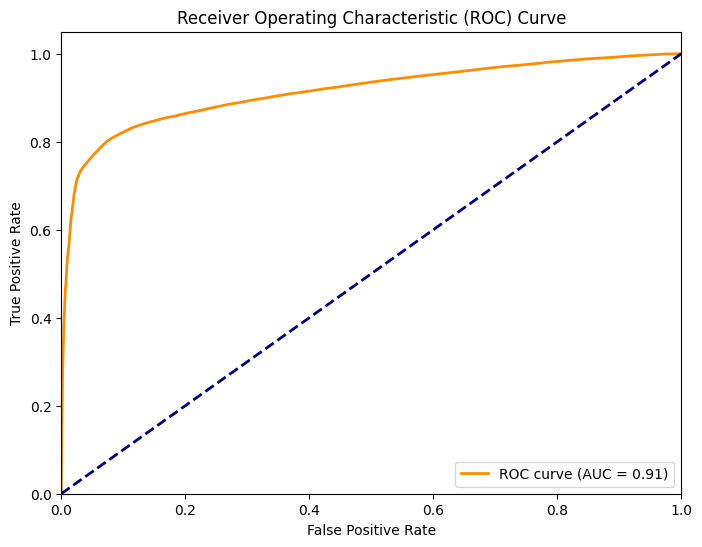

In [229]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = model_gb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

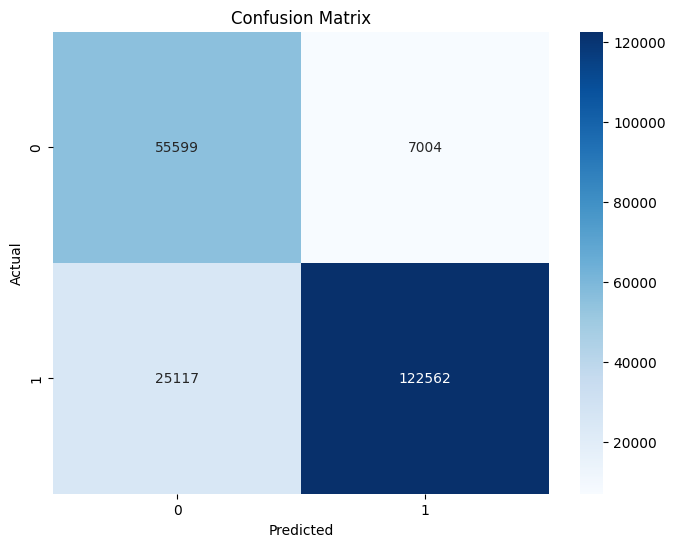

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model_gb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

По кривой ROC-AUC и по Confusion Matrix видно, что у нас хорошая расследуемость убийств

6.	Сделайте подбор гиперпараметров для лучшей модели из пункта 4.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Лучшие параметры: {'C': 10, 'solver': 'liblinear'}
Logistic Regression with Grid Search
              precision    recall  f1-score   support

           0       0.69      0.85      0.77     62603
           1       0.93      0.84      0.88    147679

    accuracy                           0.84    210282
   macro avg       0.81      0.85      0.82    210282
weighted avg       0.86      0.84      0.85    210282

ROC-AUC: 0.9085546775413013


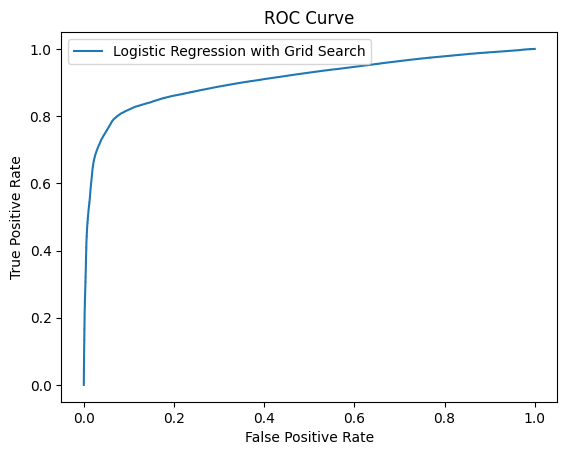

In [233]:
from sklearn.model_selection import GridSearchCV

# Грид для Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

# Оценка модели с лучшими параметрами
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)
y_pred_prob = best_log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression with Grid Search")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression with Grid Search')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

ROC-кривая: График ROC-кривой показывает очень хорошую производительность модели, так как площадь под кривой (AUC) близка к 1.

Precision (точность): Доля истинных положительных предсказаний среди всех положительных предсказаний. Это означает, что из всех совершённых убийст, 93% раскрываются.

Recall (полнота): Доля истинных положительных предсказаний среди всех реальных положительных случаев. Для класса 1 это 0.84, что означает, что модель смогла обнаружить 84% раскрытых преступлений.

F1-Score: Среднее гармоническое значение Precision и Recall. Для класса 1 это 0.88, что является хорошим показателем для сбалансированного сравнения точности и полноты.

ROC-AUC: Площадь под кривой ошибок (Receiver Operating Characteristic - ROC). Значение 0.91 говорит о том, что модель отлично различает раскрытые и нераскрытые преступления.

Модель логистической регрессии с подобранными гиперпараметрами показывает высокую производительность, особенно в выявлении раскрытых преступлений, что подтверждается высоким значением ROC-AUC и приемлемыми значениями Precision и Recall.

7.	Постройте ансамблевую модель машинного обучения.

In [234]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5)

ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')


ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

Accuracy: 0.8492310326133478
ROC AUC: 0.8586706345599803


В этом коде мы создаем ансамбль из моделей Random Forest и Gradient Boosting с помощью VotingClassifier, который объединяет их предсказания. Затем мы обучаем ансамбль на обучающем наборе данных и делаем предсказания на тестовом наборе. Наконец, мы оцениваем качество модели с помощью метрик Accuracy и ROC AUC.

8. Выводы

В данной работе был проведены все этапы построения модели машинного обучения для задачи бинарной классификации. В ходе работы была проведена обработка датасета, обучены четыре модели и выбрана лучшая модель из этих четырёх. Метрики выбранной модели достаточно высокие, есть модели, которые лучше справляются с данной задачей, но их обучение займёт больше времени.